In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report ,confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, MaxPooling1D , Activation , Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import bz2
import pickle
import joblib



In [73]:
!pip install --upgrade scikit-learn==1.5.2


In [1]:
import sklearn
print(sklearn.__version__)

1.5.2


In [3]:
def compressed_pickle(title, data):
    with bz2.BZ2File(title + '.pbz2', 'w') as f:
        pickle.dump(data, f)


#### Read Data & preprocessing 

In [9]:
df = pd.read_csv("C:\\Users\\Windows 11\\Desktop\\Code\\IEEE com\\IEEE v 3\\Crop_recommendation.csv",
                 usecols= ['N', 'P', 'K', 'humidity', 'temperature', 'ph', 'label'])
label_encoder=LabelEncoder()
df['label']=label_encoder.fit_transform(df['label'])

In [10]:
df

,N,P,K,temperature,humidity,ph,label
0,90,42,43,20.879744,82.002744,6.502985,20
1,85,58,41,21.770462,80.319644,7.038096,20
2,60,55,44,23.004459,82.320763,7.840207,20
3,74,35,40,26.491096,80.158363,6.980401,20
4,78,42,42,20.130175,81.604873,7.628473,20
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,5
2196,99,15,27,27.417112,56.636362,6.086922,5
2197,118,33,30,24.131797,67.225123,6.362608,5
2198,117,32,34,26.272418,52.127394,6.758793,5


In [5]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
label          0
dtype: int64

In [6]:
df.duplicated().sum()

0

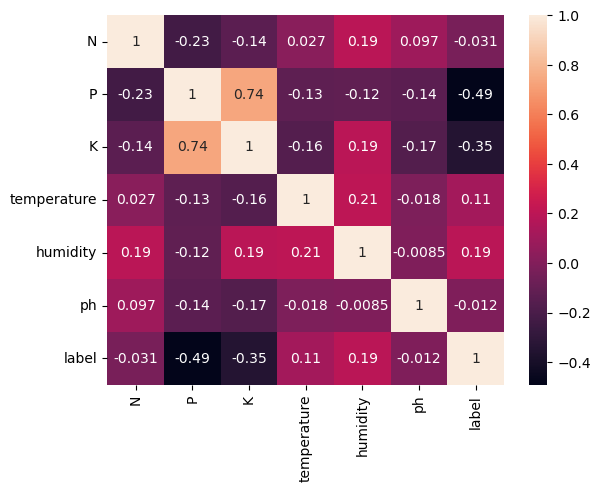

In [7]:
hm = sns.heatmap(data=df.corr(), annot=True)  
plt.show()

<Figure size 2000x1500 with 0 Axes>

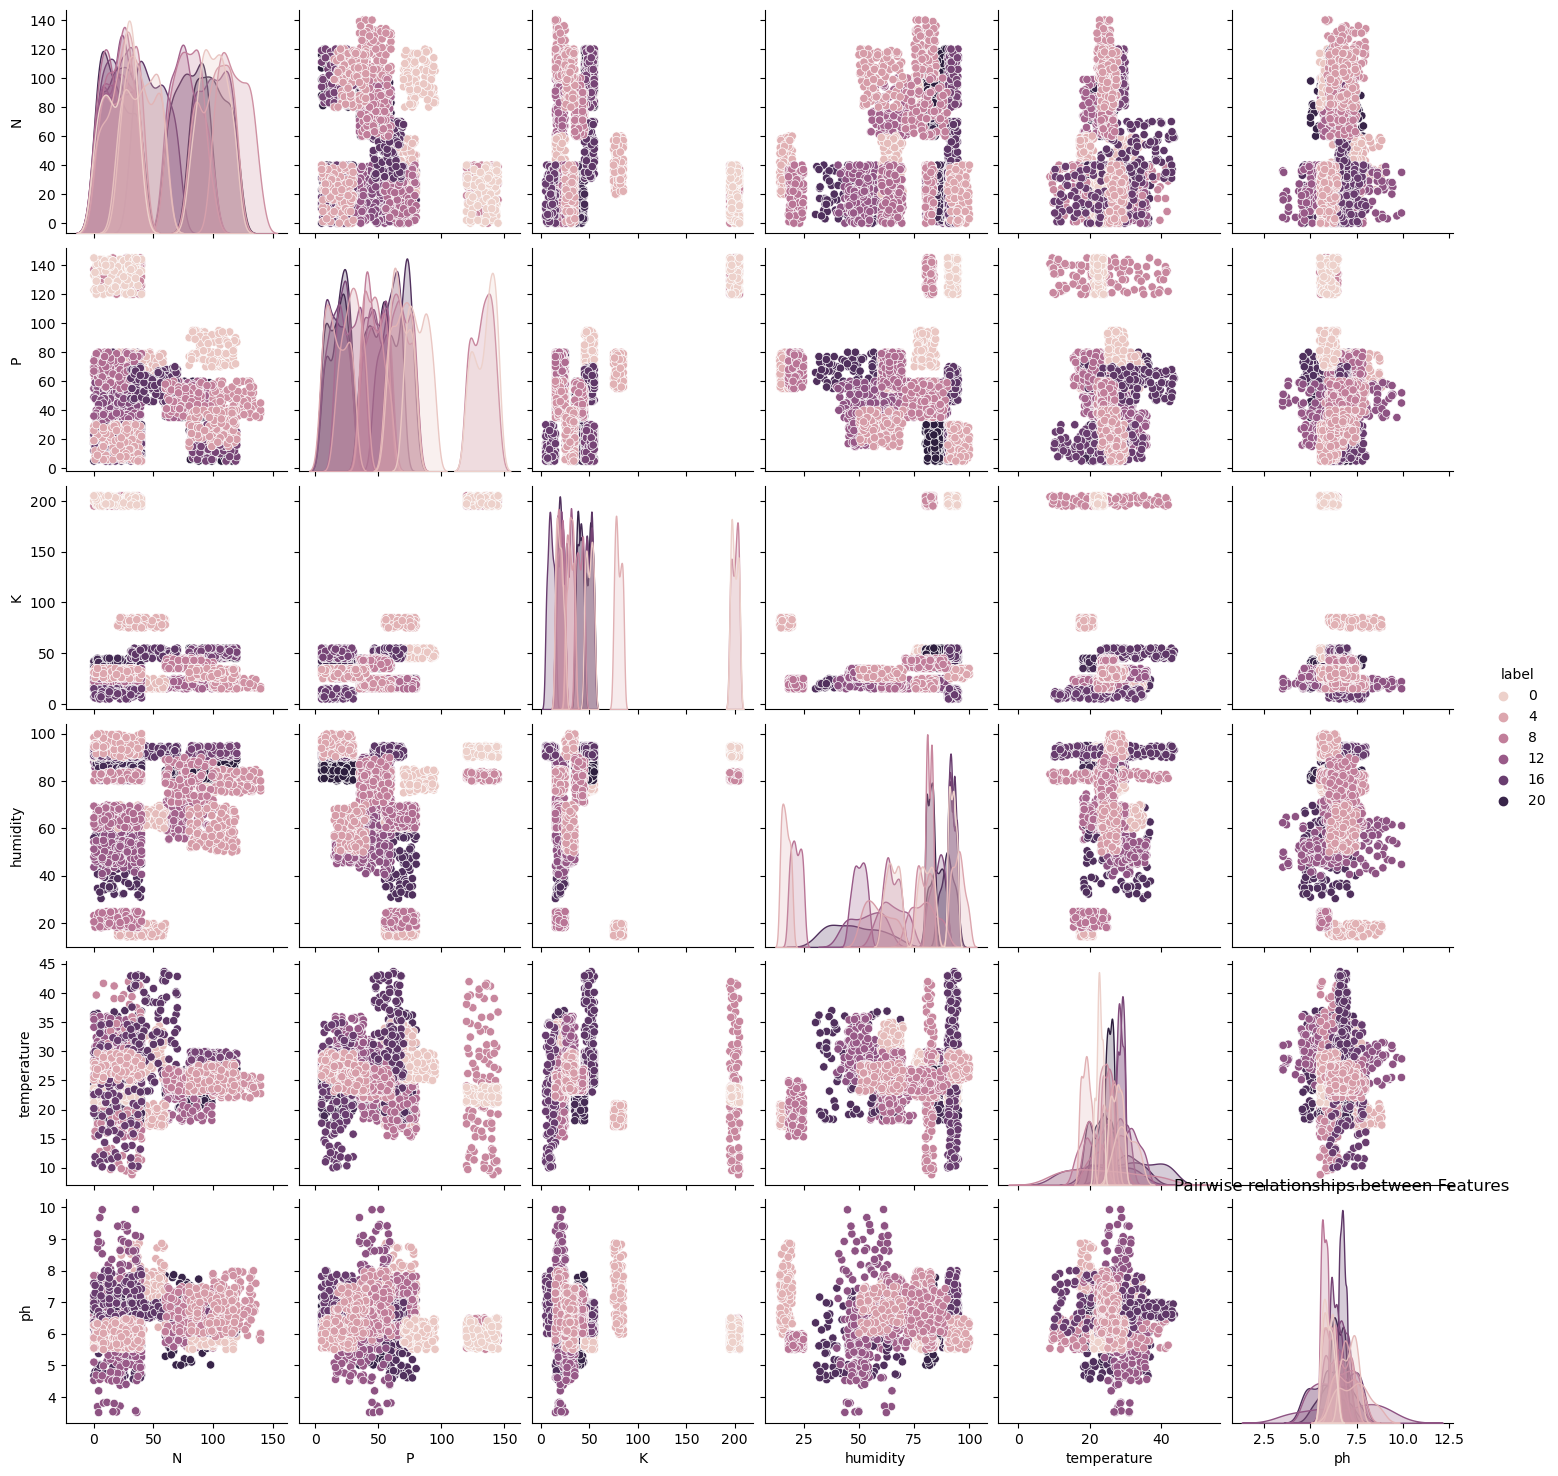

In [67]:
plt.figure(figsize=(20, 15))
sns.pairplot(df[['N', 'P', 'K', 'humidity', 'temperature', 'ph', 'label']], hue='label')
plt.title('Pairwise relationships between Features')
plt.show()

In [8]:
label_le=LabelEncoder()
df['label']=label_le.fit_transform(df['label'])
label_le.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [11]:
x= df.drop(['label'],axis=1).values
y= df['label'].values

#### Decision Tree

In [57]:
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size= 0.25, random_state=42)

In [61]:
dt= DecisionTreeClassifier(max_depth=15,max_features=6,random_state=42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=15, max_features=6, random_state=42)

In [62]:
dt.score(x_train,y_train)

0.9975757575757576

In [63]:
dt.score(x_test,y_test)

0.9472727272727273

In [64]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

y_pred_dt = dt.predict(x_test)
y_p = dt.predict(x_train)

mse_dt = mean_squared_error(y_test,y_pred_dt)
mse_dt_t = mean_squared_error(y_train,y_p)
rmse = mse_dt**0.5
rmse_t = mse_dt_t**0.5
print('test ', rmse )
print('train ', rmse_t)


test  2.0828302422861587
train  0.451260859854213


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        23
   blackgram       0.92      0.92      0.92        24
    chickpea       1.00      1.00      1.00        31
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        19
        jute       0.77      0.89      0.83        27
 kidneybeans       1.00      1.00      1.00        24
      lentil       0.70      0.93      0.80        15
       maize       1.00      1.00      1.00        23
       mango       1.00      0.93      0.96        27
   mothbeans       0.90      0.69      0.78        26
    mungbean       1.00      1.00      1.00        26
   muskmelon       1.00      1.00      1.00        22
      orange       1.00      1.00      1.00        19
      papaya       1.00    

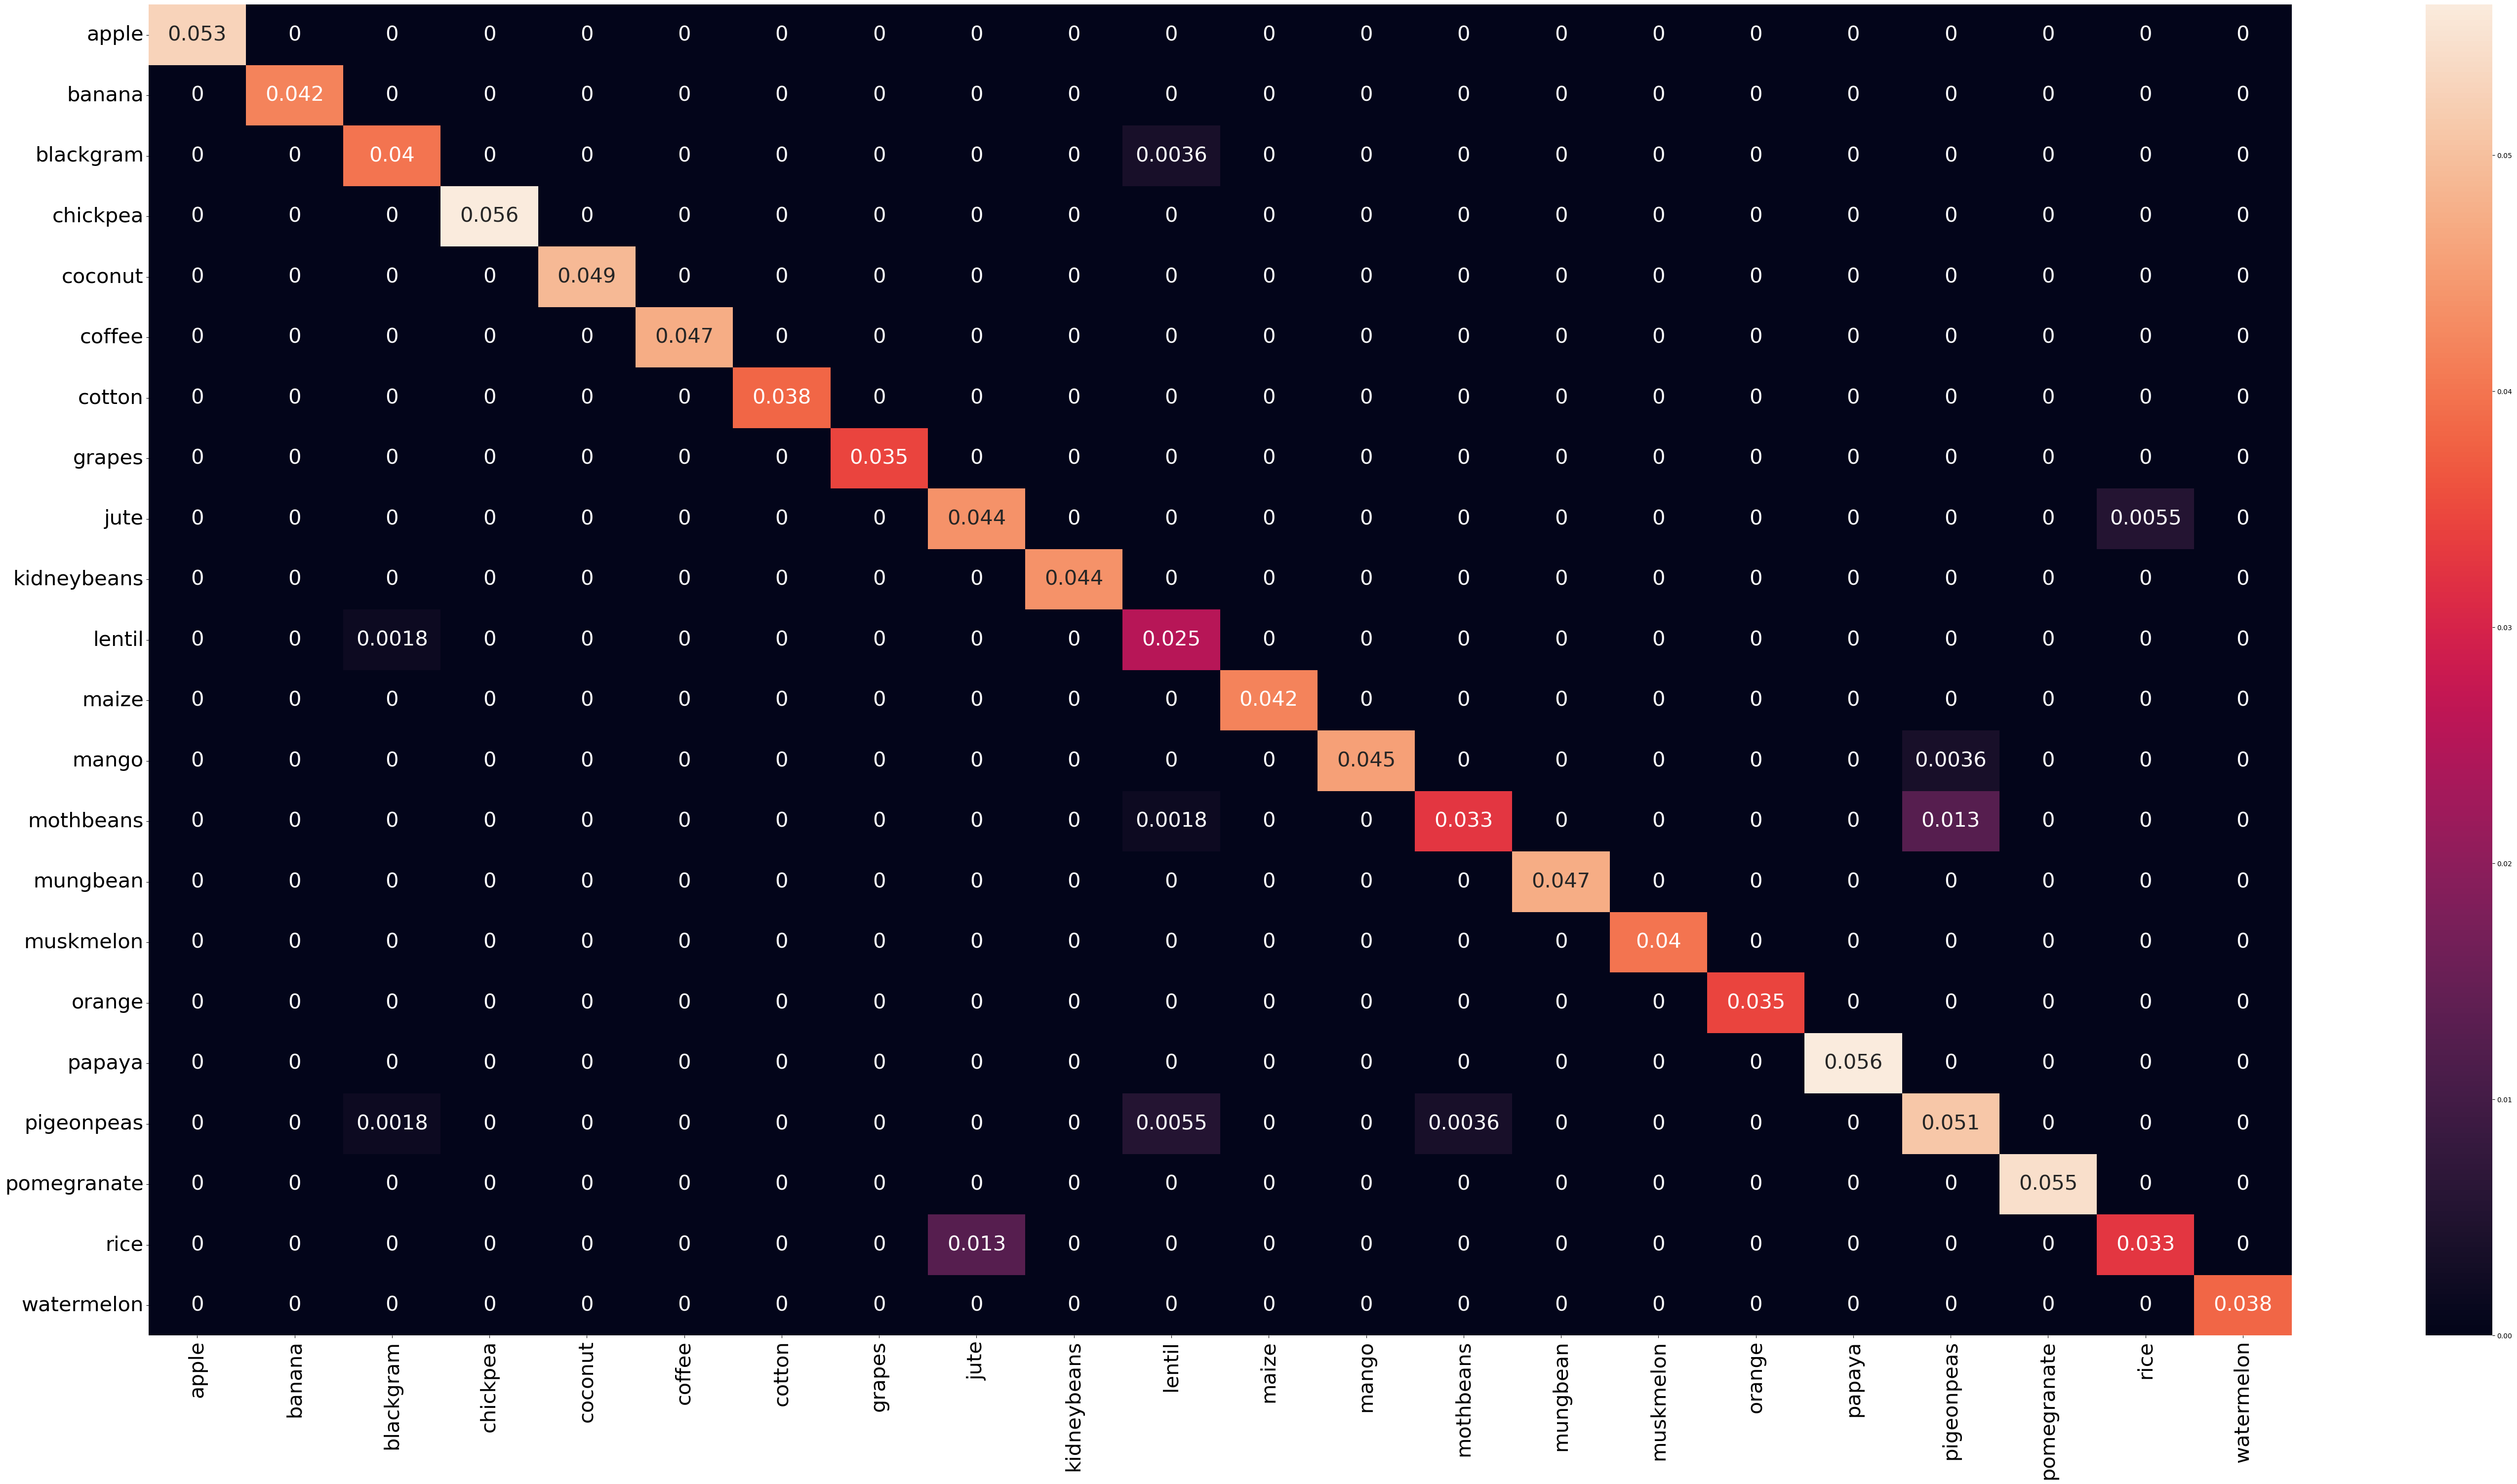

In [65]:
y_pred = dt.predict(x_test)

np.set_printoptions()
plt.subplots(figsize=(70,35))
cf_matrix = confusion_matrix(label_le.inverse_transform(y_test), label_le.inverse_transform(y_pred))
print(classification_report(label_le.inverse_transform(y_test),label_le.inverse_transform(y_pred)))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':30}
            ,xticklabels=label_le.classes_,yticklabels=label_le.classes_)
plt.xticks(fontsize=30,rotation=90)  # Change the x-axis font size
plt.yticks(fontsize=30,rotation=0) 
plt.show()


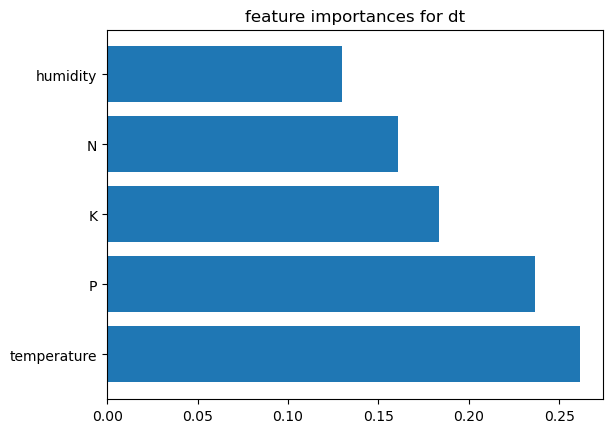

In [66]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for dt')
    plt.show()

features_names = ['N', 'P', 'K', 'humidity', 'temperature', 'ph']

f_importances(abs(dt.feature_importances_), features_names, top=5)


#### Random Forest

In [12]:
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size= 0.25, random_state=42)

In [14]:
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],       
    'max_depth': [15,20, 25,30, None],      
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 2, 4],         
    'max_features': [1,2,3,4,5],      
    'bootstrap': [True, False]        
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

In [ ]:
#We ran this call on Kaggle to make it faster.
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

In [15]:
#These are the best parameters.
rf = RandomForestClassifier(bootstrap=False,max_depth=15,max_features=2,min_samples_leaf=1,min_samples_split=5,n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=15, max_features=2,
                       min_samples_split=5)

In [16]:
rf.score(x_train,y_train)

0.9993939393939394

In [17]:
rf.score(x_test,y_test)

0.9727272727272728

In [18]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

y_pred_rf = rf.predict(x_test)
y_p = rf.predict(x_train)

mse_rf = mean_squared_error(y_test,y_pred_rf)
mse_rf_t = mean_squared_error(y_train,y_p)
rmse = mse_rf**0.5
rmse_t = mse_rf_t**0.5
print('test ', rmse )
print('train ', rmse_t)

test  1.70293863659264
train  0.29541957835039856


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        23
   blackgram       0.96      0.92      0.94        24
    chickpea       1.00      1.00      1.00        31
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        19
        jute       0.81      0.96      0.88        27
 kidneybeans       1.00      1.00      1.00        24
      lentil       0.75      1.00      0.86        15
       maize       1.00      1.00      1.00        23
       mango       1.00      1.00      1.00        27
   mothbeans       0.92      0.92      0.92        26
    mungbean       1.00      1.00      1.00        26
   muskmelon       1.00      1.00      1.00        22
      orange       1.00      1.00      1.00        19
      papaya       1.00    

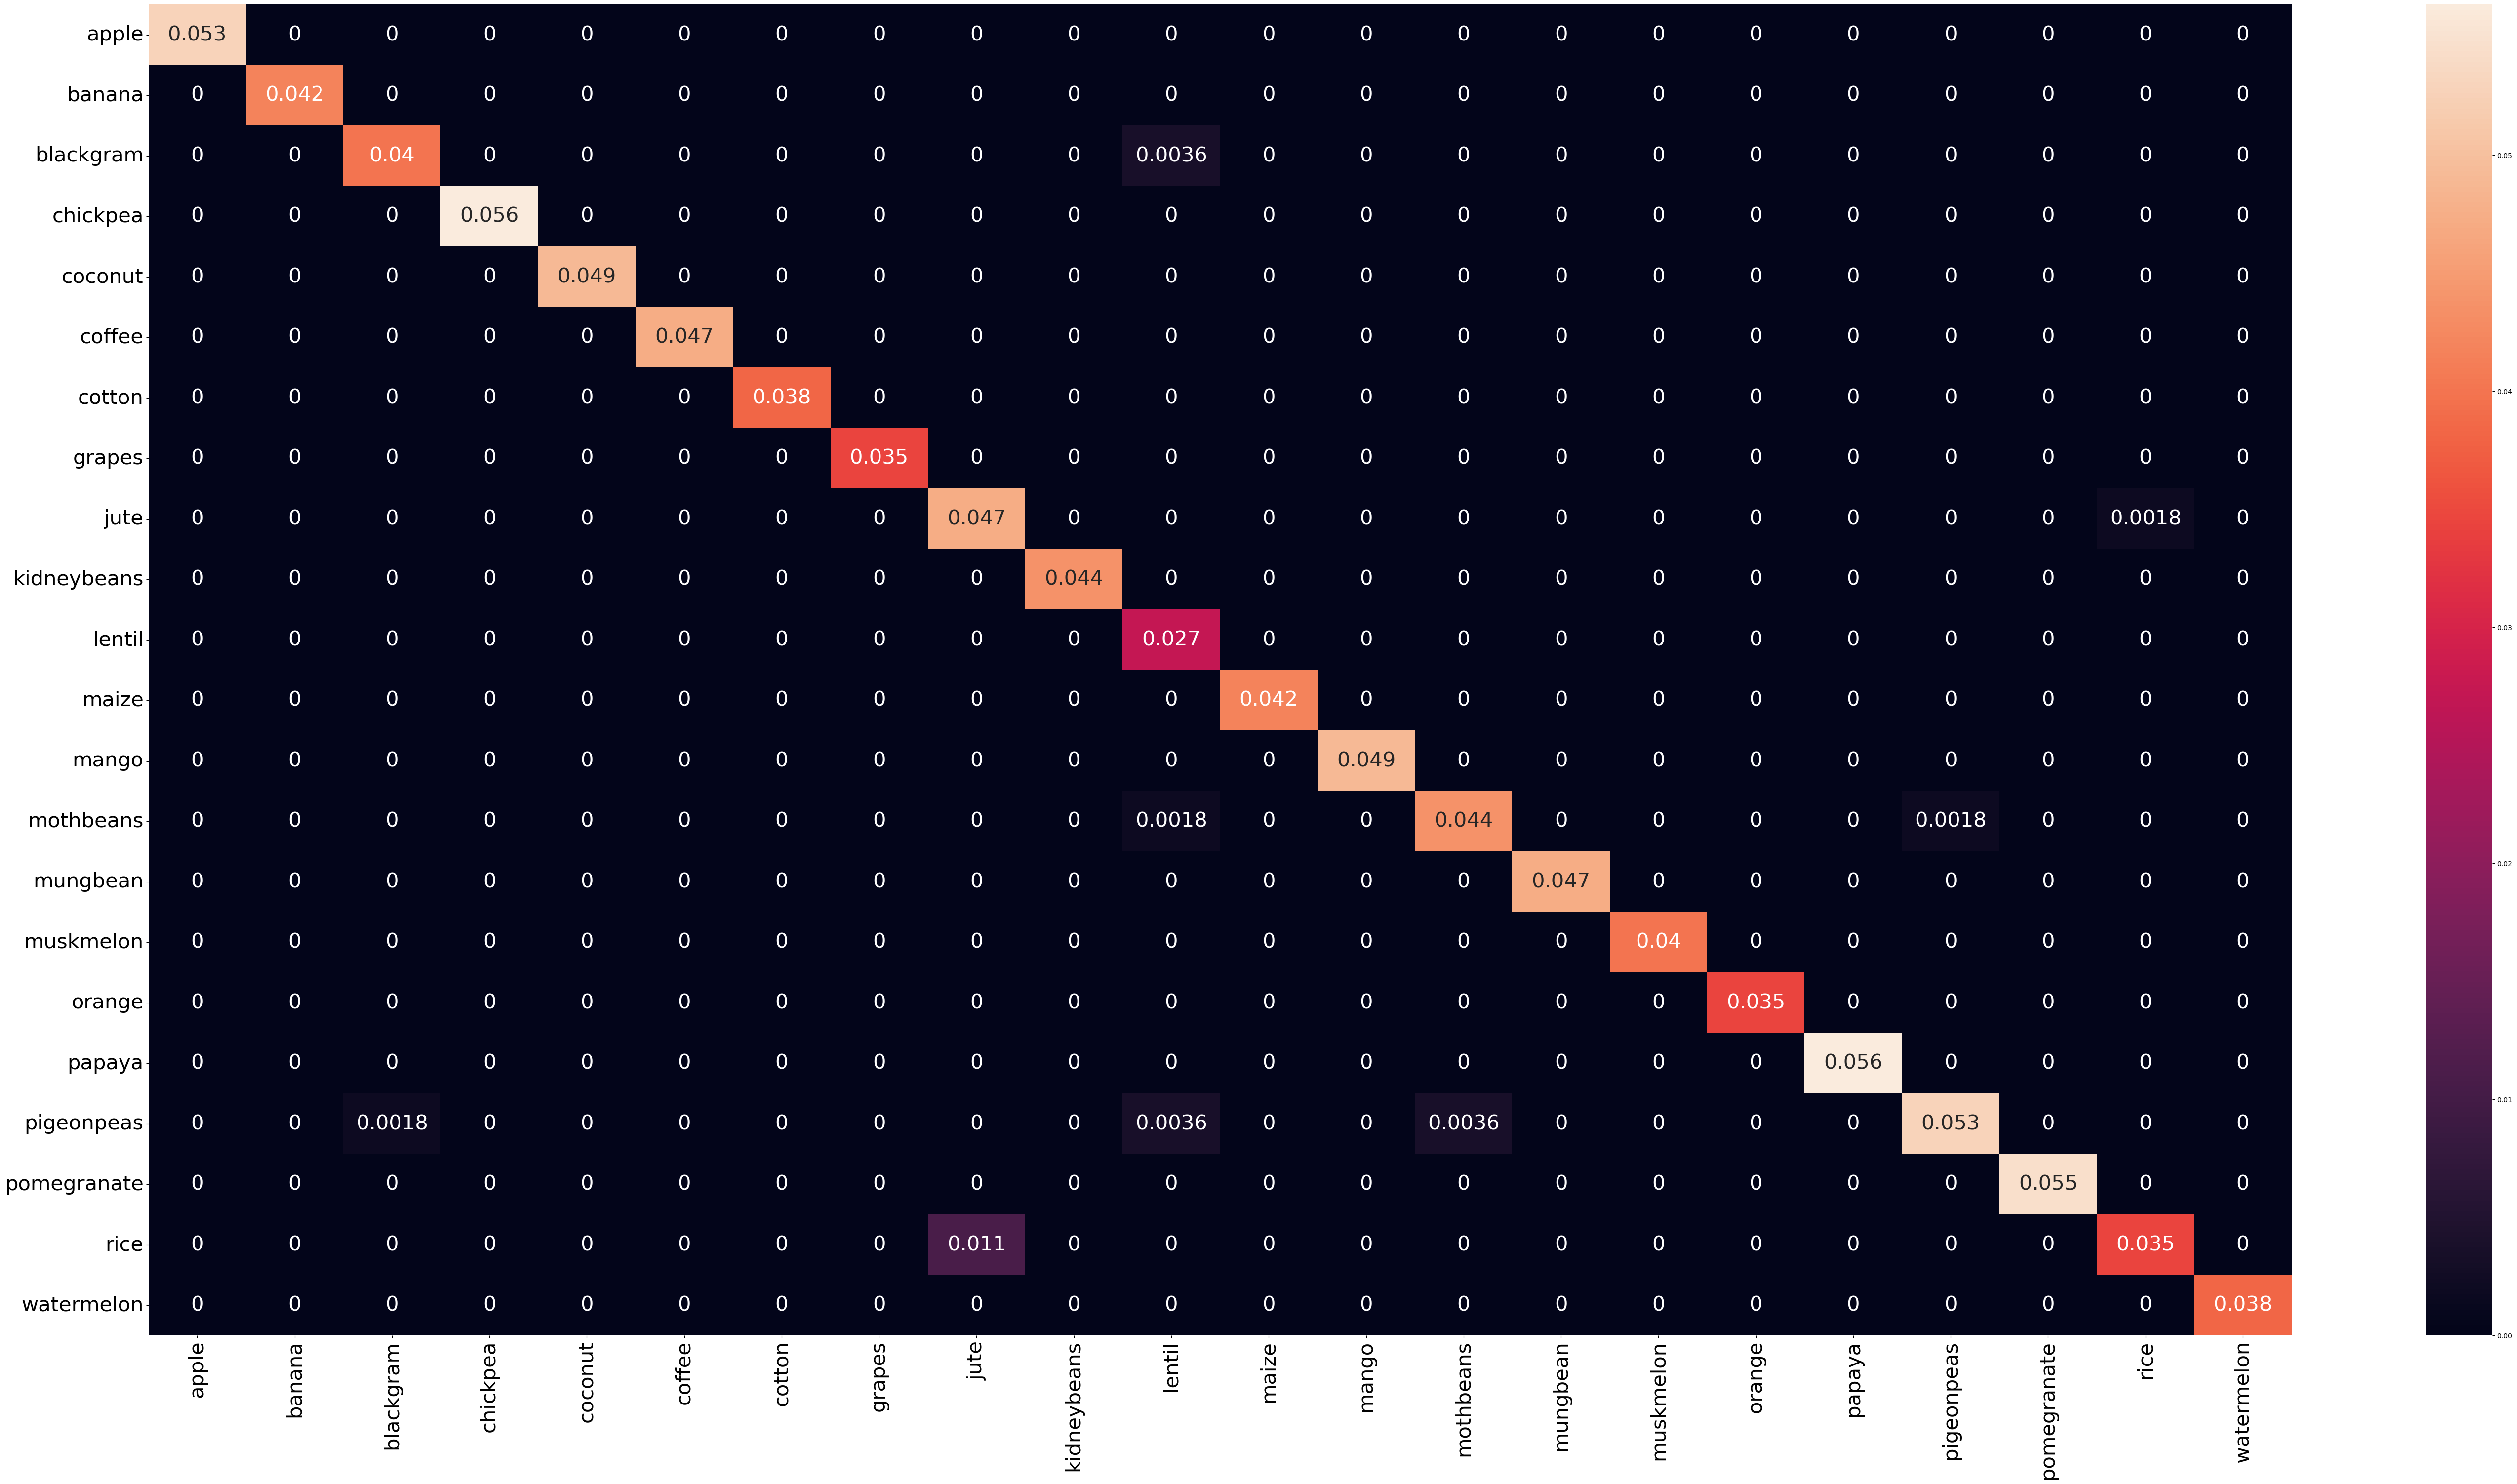

In [20]:
y_pred = rf.predict(x_test)

np.set_printoptions()
plt.subplots(figsize=(70,35))
cf_matrix = confusion_matrix(label_le.inverse_transform(y_test), label_le.inverse_transform(y_pred))
print(classification_report(label_le.inverse_transform(y_test),label_le.inverse_transform(y_pred)))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':30}
            ,xticklabels=label_le.classes_,yticklabels=label_le.classes_)
plt.xticks(fontsize=30,rotation=90)  # Change the x-axis font size
plt.yticks(fontsize=30,rotation=0) 
plt.show()


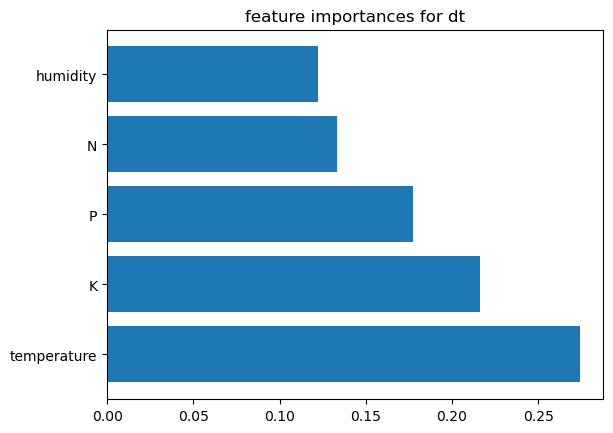

In [21]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for dt')
    plt.show()

features_names = ['N', 'P', 'K', 'humidity', 'temperature', 'ph']

f_importances(abs(rf.feature_importances_), features_names, top=5)


In [52]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_encoder=LabelEncoder()
df['label']=label_encoder.fit_transform(df['label'])

values_list = [[87,40,30,25.3,83.1,6.9]]
pred = rf.predict(values_list)
prediction = label_encoder.inverse_transform([np.argmax(pred)])[0]

In [53]:
prediction

'apple'

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

values_list = [[N, P, K, Humidity, Temp, PH, rainfall]]
pred = model.predict(values_list)
prediction = label_encoder.inverse_transform([np.argmax(pred)])[0]

In [19]:
with open('random_forest_model.joblib', 'wb') as model_file:
    joblib.dump(rf, model_file)
    
with bz2.BZ2File('random_forest_model.pbz2', 'wb') as model_file:
    pickle.dump(rf, model_file)

#### Deep Learning

In [22]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [23]:
x_reshaped = x_scaled.reshape(x_scaled.shape[0], x_scaled.shape[1], 1)
y_encoded = to_categorical(y)


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_reshaped, y_encoded, test_size=0.25, random_state=42)


In [28]:
model = Sequential()
model.add(Conv1D(filters=512, kernel_size=2, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.5))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(y_encoded.shape[1], activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 5, 512)            1536      
                                                                 
 dropout_2 (Dropout)         (None, 5, 512)            0         
                                                                 
 conv1d_4 (Conv1D)           (None, 4, 256)            262400    
                                                                 
 dropout_3 (Dropout)         (None, 4, 256)            0         
                                                                 
 conv1d_5 (Conv1D)           (None, 3, 128)            65664     
                                                                 
 flatten_1 (Flatten)         (None, 384)               0         
                                                                 
 dense_1 (Dense)             (None, 22)               

In [29]:
early_stop= EarlyStopping(monitor='val_loss',mode='auto',verbose=1, patience=10)
history = model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test),batch_size=128,callbacks=early_stop)


Epoch 1/100
13/13 [==============================] - 1s 27ms/step - loss: 2.8544 - accuracy: 0.1303 - val_loss: 2.3889 - val_accuracy: 0.2982
Epoch 2/100
13/13 [==============================] - 0s 16ms/step - loss: 1.9650 - accuracy: 0.4055 - val_loss: 1.2377 - val_accuracy: 0.6891
Epoch 3/100
13/13 [==============================] - 0s 17ms/step - loss: 0.9623 - accuracy: 0.7188 - val_loss: 0.5514 - val_accuracy: 0.8000
Epoch 4/100
13/13 [==============================] - 0s 14ms/step - loss: 0.5255 - accuracy: 0.8200 - val_loss: 0.3802 - val_accuracy: 0.8582
Epoch 5/100
13/13 [==============================] - 0s 14ms/step - loss: 0.4019 - accuracy: 0.8418 - val_loss: 0.3026 - val_accuracy: 0.8855
Epoch 6/100
13/13 [==============================] - 0s 14ms/step - loss: 0.3162 - accuracy: 0.8709 - val_loss: 0.2908 - val_accuracy: 0.8855
Epoch 7/100
13/13 [==============================] - 0s 14ms/step - loss: 0.2876 - accuracy: 0.8855 - val_loss: 0.2674 - val_accuracy: 0.8891
Epoch 

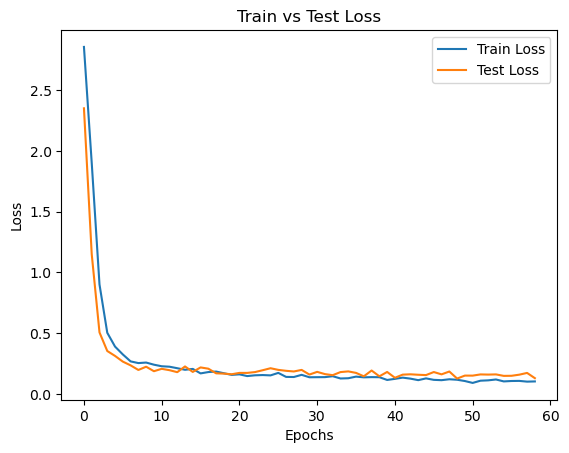

In [157]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation accuracy over epochs
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Test Loss')
plt.legend()
plt.show()


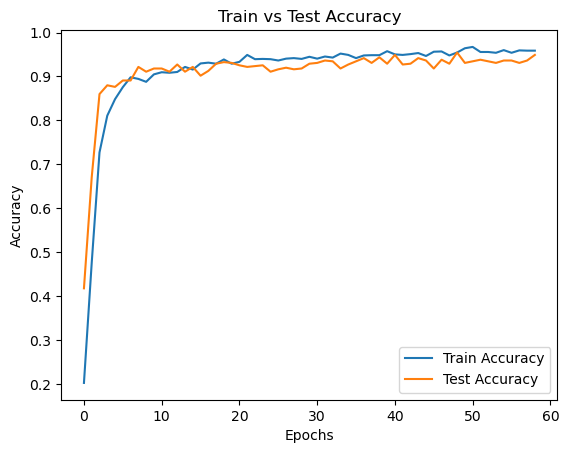

In [158]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation accuracy over epochs
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.legend()
plt.show()


In [159]:
final_train_acc = train_acc[-1]
final_val_acc = val_acc[-1]

print(f"Final Training Accuracy: {final_train_acc * 100:.2f}%")
print(f"Final Validation Accuracy (Test Accuracy): {final_val_acc * 100:.2f}%")

Final Training Accuracy: 95.88%
Final Validation Accuracy (Test Accuracy): 94.91%


18/18 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        23
   blackgram       0.81      0.92      0.86        24
    chickpea       1.00      1.00      1.00        31
     coconut       1.00      1.00      1.00        27
      coffee       0.96      0.96      0.96        26
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        19
        jute       0.71      0.81      0.76        27
 kidneybeans       0.89      1.00      0.94        24
      lentil       0.87      0.87      0.87        15
       maize       1.00      1.00      1.00        23
       mango       1.00      1.00      1.00        27
   mothbeans       0.96      0.88      0.92        26
    mungbean       1.00      1.00      1.00        26
   muskmelon       1.00      1.00      1.00        22
      orange       1.00     

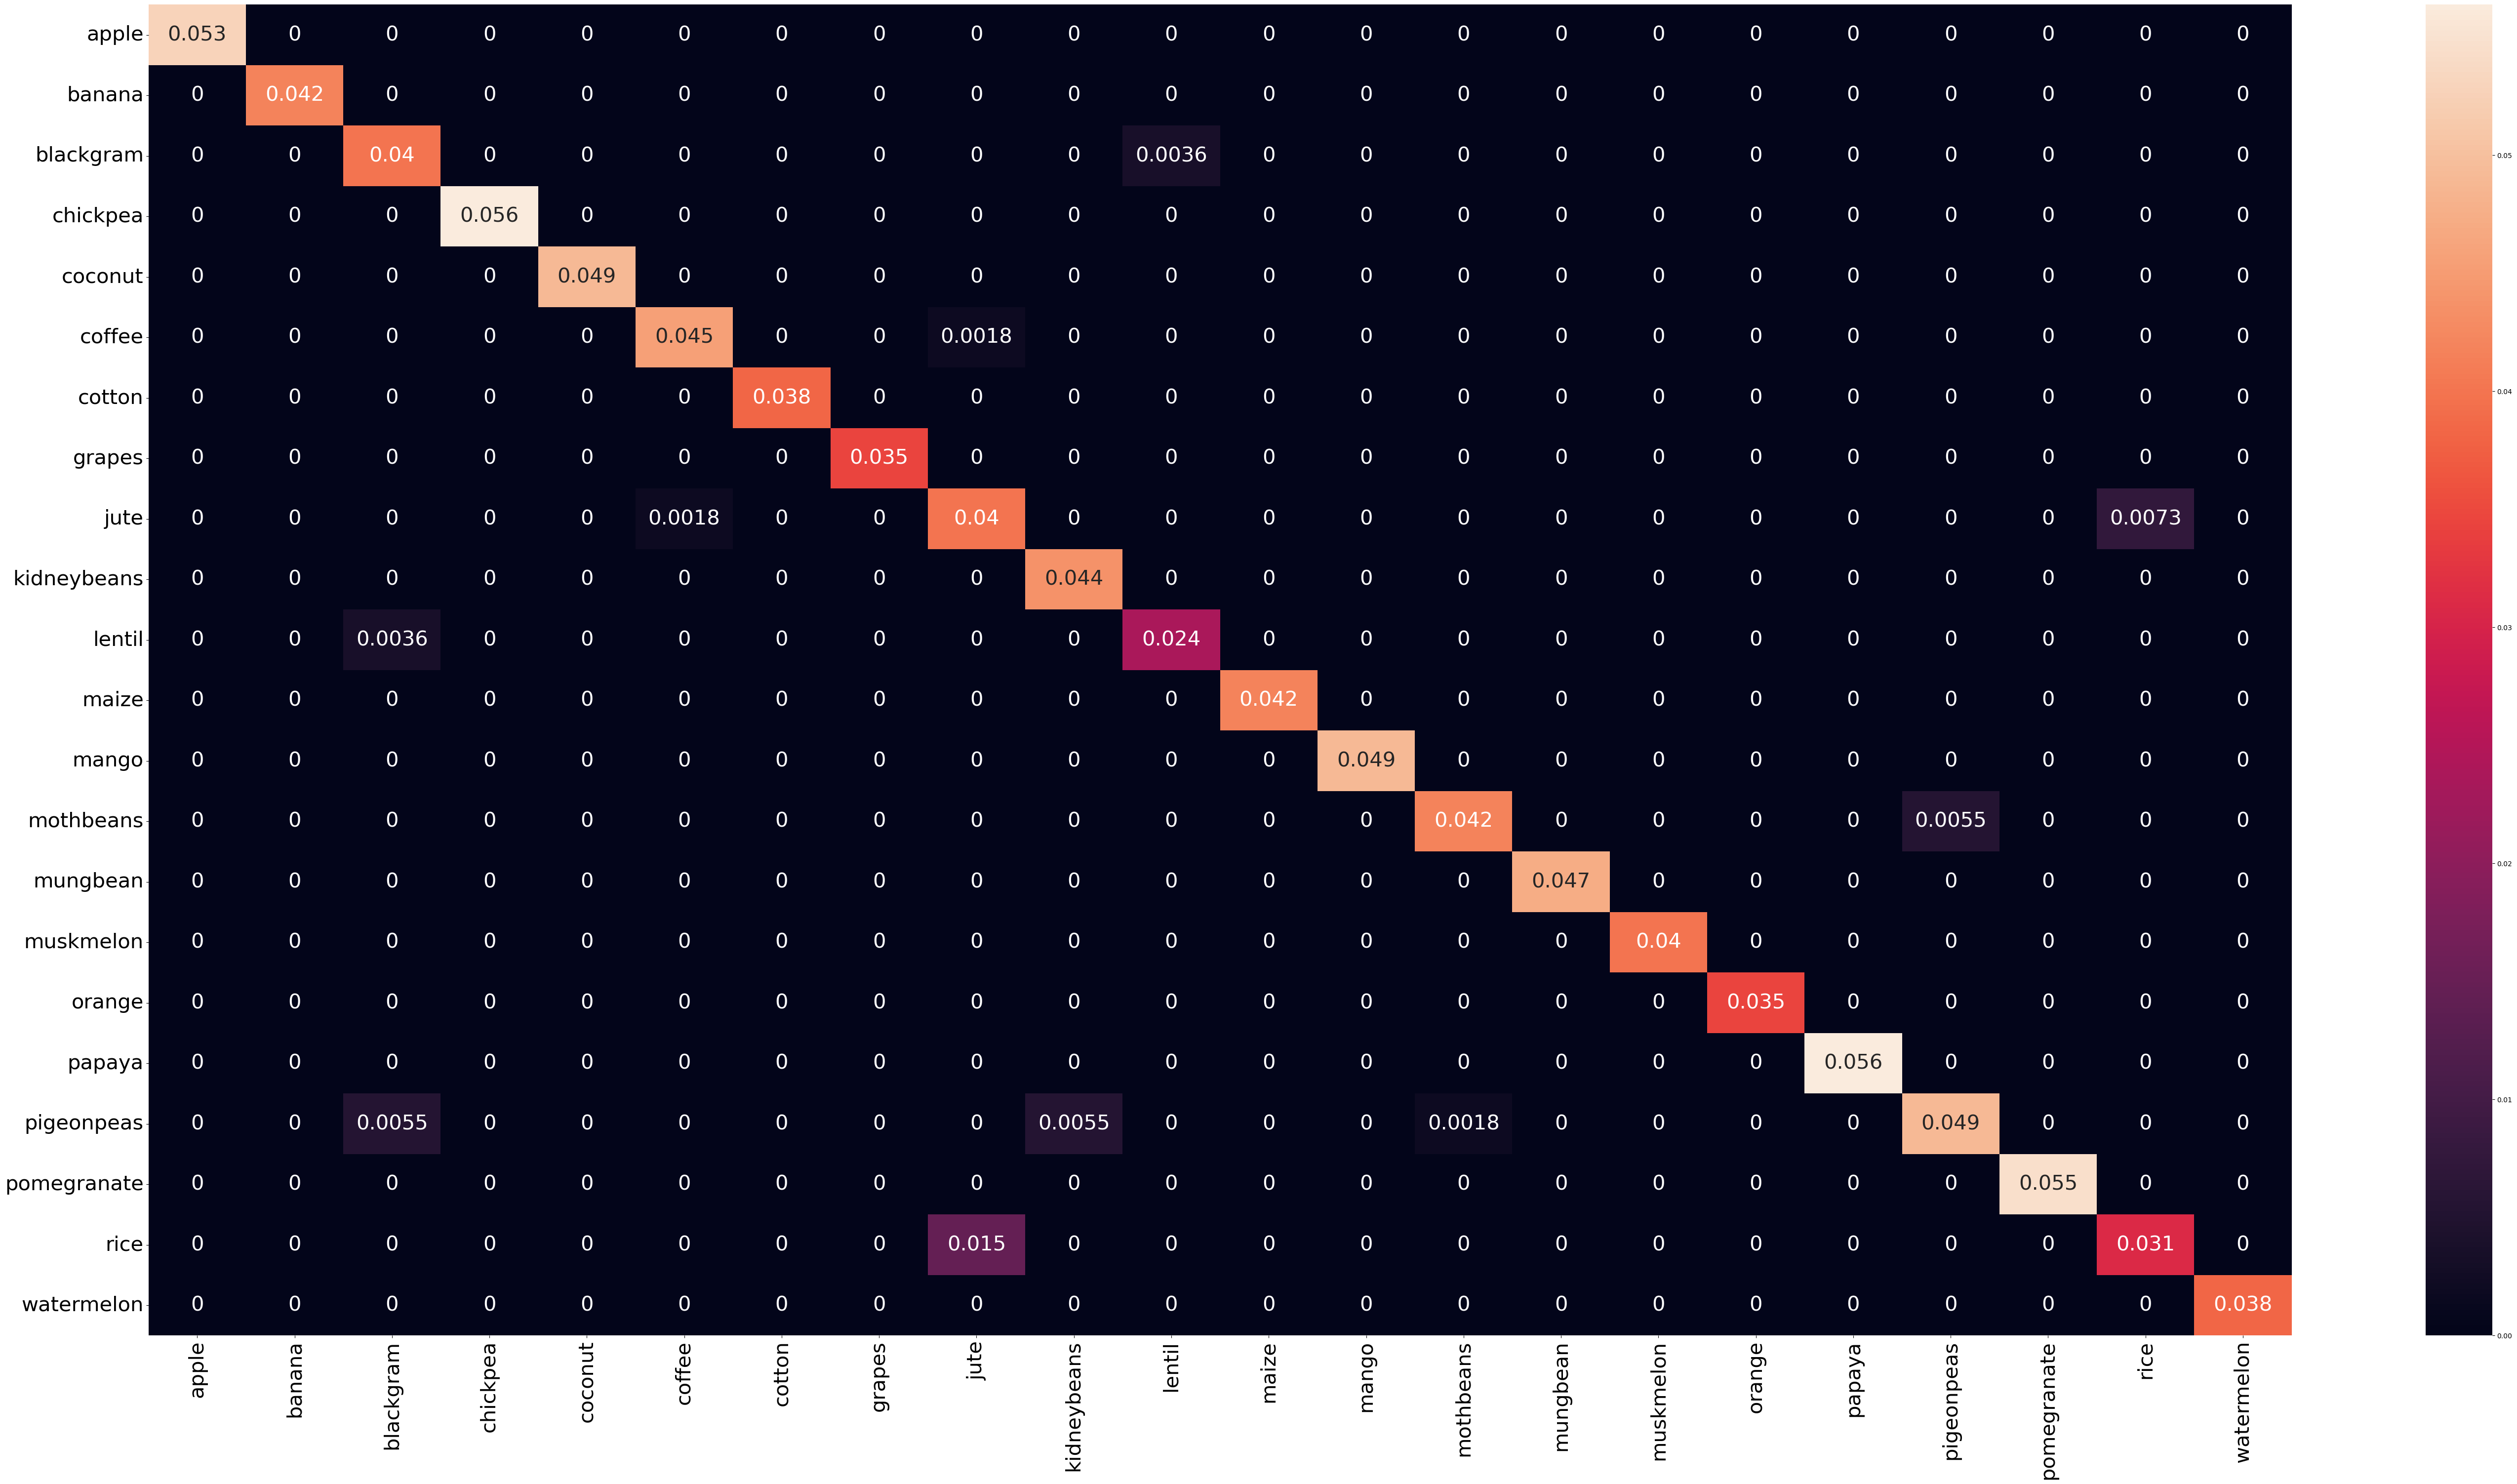

In [160]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
np.set_printoptions()
plt.subplots(figsize=(70,35))
cf_matrix = confusion_matrix(label_le.inverse_transform(y_test), label_le.inverse_transform(y_pred))
print(classification_report(label_le.inverse_transform(y_test),label_le.inverse_transform(y_pred)))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':30}
            ,xticklabels=label_le.classes_,yticklabels=label_le.classes_)
plt.xticks(fontsize=30,rotation=90)  # Change the x-axis font size
plt.yticks(fontsize=30,rotation=0) 
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_encoder=LabelEncoder()
df['label']=label_encoder.fit_transform(df['label'])

values_list = [[N, P, K, Humidity, Temp, PH, rainfall]]
scaler = StandardScaler()
values_scaled = scaler.fit_transform(s)
values_reshaped = values_scaled.reshape(values_scaled.shape[0], values_scaled.shape[1], 1)
pred = model.predict(values_reshaped)
prediction = label_encoder.inverse_transform([np.argmax(pred)])[0]

In [ ]:
values_list = [[87,40,30,25.3,83.1,6.9]]
scaler = StandardScaler()
values_scaled = scaler.fit_transform(s)
values_reshaped = values_scaled.reshape(values_scaled.shape[0], values_scaled.shape[1], 1)
pred = model.predict(values_reshaped)
prediction = label_le.inverse_transform([np.argmax(pred)])[0]

In [180]:
with open('Deep_learning.joblib', 'wb') as model_file:
    joblib.dump(model, model_file)

with bz2.BZ2File('Deep_learning.pbz2', 'wb') as model_file:
    pickle.dump(model, model_file)